## Relationship between Socio-Economic Factors (Education and Age) and Types of Products Purchased

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('Datasets/cleaned_customer.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,...,3,4,5,0,0,0,0,0,0,0
2212,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,...,2,5,7,0,0,0,1,0,0,0
2213,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,...,3,13,6,0,1,0,0,0,0,0
2214,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,...,5,10,3,0,0,0,0,0,0,0


In [3]:
joint_response = pd.DataFrame(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
joint_response

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2211,709,43,182,42,118,247
2212,406,0,30,0,0,8
2213,908,48,217,32,12,24
2214,428,30,214,80,30,61


Looking through the data, we find many of them suitable to be used as predictor variables for our study. In this portion, we will be using socio-economic factors as predictors for the types of products - wines, fruits, meat, fish, sweets and gold - purchased from the business.

As such, the chosen predictor variables are:
1. Education
2. Birth year (Age)

Our hypothesis is that those of a greater age and education level have a greater preference for more 'luxurious goods' such as wine, meat and gold as these factors are more likely to influence their income and hence propensity to spend on more 'valuable' items.

In [4]:
joint_predictor = pd.DataFrame(df[['Education', 'Year_Birth']])
joint_predictor

,Education,Year_Birth
0,Graduation,1957
1,Graduation,1954
2,Graduation,1965
3,Graduation,1984
4,PhD,1981
...,...,...
2211,Graduation,1967
2212,PhD,1946
2213,Graduation,1981
2214,Master,1956


In [5]:
jointplot= pd.DataFrame(df[['Education', 'Year_Birth','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Recency', 'Dt_Customer']])
jointplot

,Education,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Recency,Dt_Customer
0,Graduation,1957,635,88,546,172,88,88,58,04-09-2012
1,Graduation,1954,11,1,6,2,1,6,38,08-03-2014
2,Graduation,1965,426,49,127,111,21,42,26,21-08-2013
3,Graduation,1984,11,4,20,10,3,5,26,10-02-2014
4,PhD,1981,173,43,118,46,27,15,94,19-01-2014
...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,1967,709,43,182,42,118,247,46,13-06-2013
2212,PhD,1946,406,0,30,0,0,8,56,10-06-2014
2213,Graduation,1981,908,48,217,32,12,24,91,25-01-2014
2214,Master,1956,428,30,214,80,30,61,8,24-01-2014


In [6]:
jointplot['Dt_Customer'] = pd.to_datetime(jointplot['Dt_Customer'], format='%d-%m-%Y')
jointplot['CurrentDate'] = datetime.datetime(2021, 1, 1)
jointplot['numMonths'] = (jointplot['CurrentDate'] - jointplot['Dt_Customer']) / np.timedelta64(1, 'D') / 30
jointplot['Recency'] = jointplot['Recency'] / 30


In [7]:
#average purchases over the months
for var in jointplot.columns[2:8]:
    jointplot[var] = jointplot[var]/ (jointplot["numMonths"] - jointplot["Recency"])

jointplot.drop(columns = ['Dt_Customer', 'CurrentDate', "numMonths", "Recency"], inplace = True)
jointplot

,Education,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Graduation,1957,6.386188,0.885015,5.491116,1.729802,0.885015,0.885015
1,Graduation,1954,0.134529,0.012230,0.073380,0.024460,0.012230,0.073380
2,Graduation,1965,4.797297,0.551802,1.430180,1.250000,0.236486,0.472973
3,Graduation,1984,0.132477,0.048173,0.240867,0.120434,0.036130,0.060217
4,PhD,1981,2.122699,0.527607,1.447853,0.564417,0.331288,0.184049
...,...,...,...,...,...,...,...,...
2211,Graduation,1967,7.840029,0.475488,2.012532,0.464431,1.304829,2.731294
2212,PhD,1946,5.202905,0.000000,0.384451,0.000000,0.000000,0.102520
2213,Graduation,1981,11.154791,0.589681,2.665848,0.393120,0.147420,0.294840
2214,Master,1956,5.083135,0.356295,2.541568,0.950119,0.356295,0.724466


### Bi-variate Analysis: Education and Age as Predictor Variables
We will first plot the box and whiskers plot, barchart, joint plot and heatmap for these factors.

<Axes: xlabel='Year_Birth', ylabel='Count'>

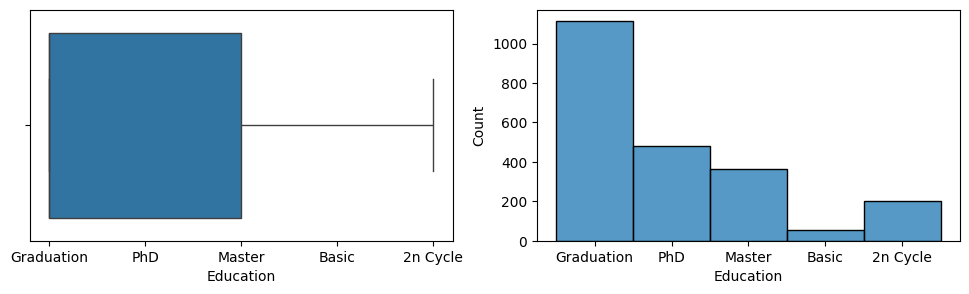

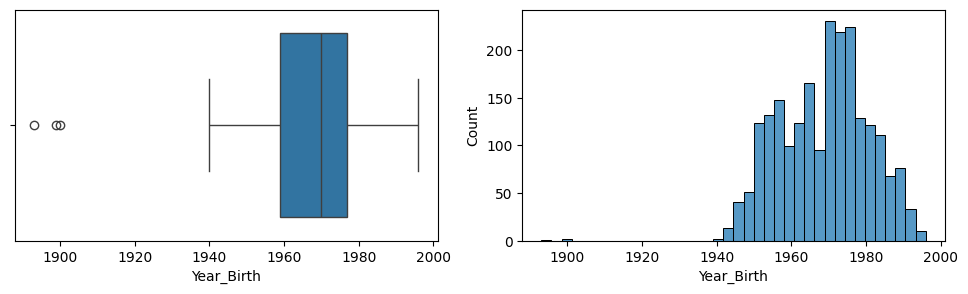

In [8]:
f, axes = plt.subplots(1, 2, figsize=(12, 3))

sb.boxplot(data = joint_predictor['Education'], orient = "h", ax = axes[0])
sb.histplot(data = joint_predictor['Education'], ax = axes[1])

f, axes = plt.subplots(1, 2, figsize=(12, 3))

sb.boxplot(data = joint_predictor['Year_Birth'], orient = "h", ax = axes[0])
sb.histplot(data = joint_predictor['Year_Birth'], ax = axes[1])

### Encoding Non-Numeric Values (Income)
As Education is a non-numeric factor, we need to encode it into numeric values using label encoding before a heatmap can be produced.

In [9]:
jointplot_numeric=jointplot.copy()

In [10]:
jointplot['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
education_mapping = {'Graduation': 0, 'PhD': 1, 'Master': 2, 'Basic': 3, '2n Cycle': 4}
jointplot_numeric['education_encoded'] = jointplot_numeric['Education'].map(education_mapping)

jointplot_numeric.drop('Education', axis=1, inplace=True)

<Axes: xlabel='education_encoded', ylabel='Density'>

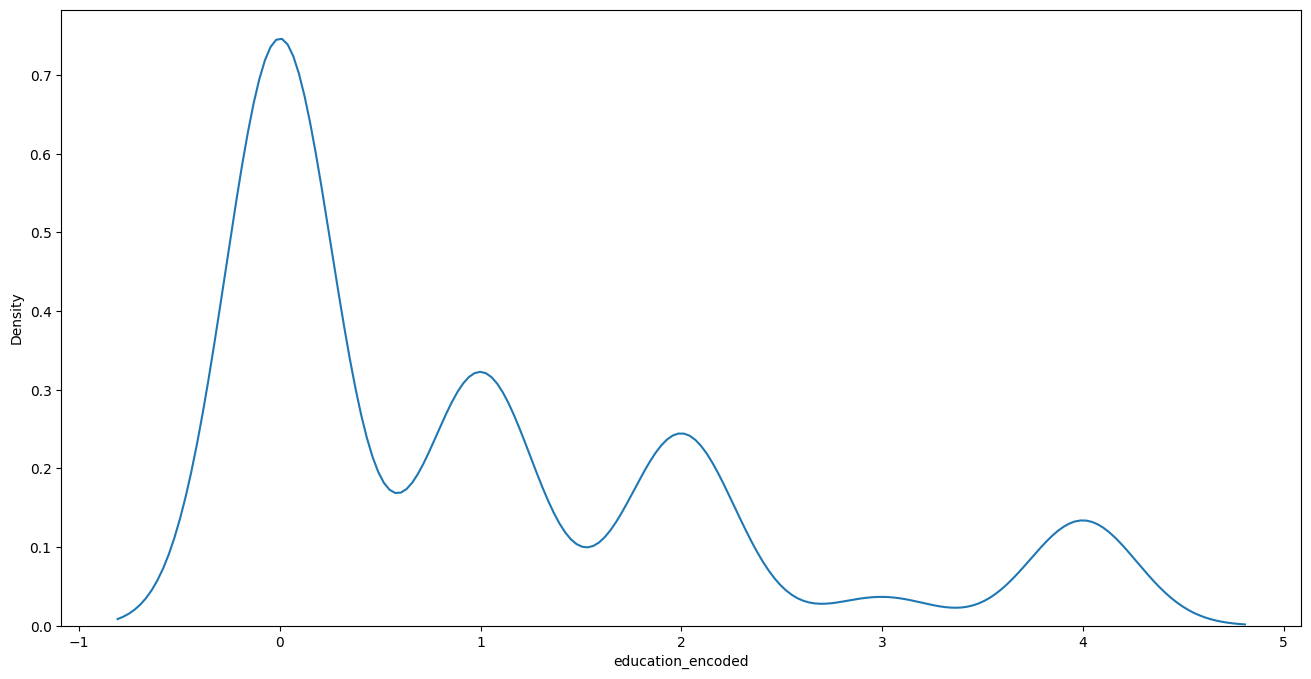

In [12]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = jointplot_numeric['education_encoded'])

In [13]:
skewness_education = jointplot_numeric['education_encoded'].skew()
print("Skewness of Education variable:", skewness_education)

Skewness of Education variable: 1.2041984747854662


The skewness value of ~1.20 indicates that the distribution is skewed to the right, towards the Education value 'Graduation', which could affect our clustering analysis later moving forward.

### Removing Outliers

In [14]:
# remove outliers function
def removeOut(dataframe):
    altered = pd.DataFrame() 
    for var in dataframe.select_dtypes(include=['number']): 
        Q1 = dataframe[var].quantile(0.25) 
        Q3 = dataframe[var].quantile(0.75) 
        IQR = Q3 - Q1
        altered[var] = dataframe[var][((dataframe[var] > (Q1 - 1.5 * IQR)) & (dataframe[var] < (Q3 + 1.5 * IQR)))] 
    altered = altered.dropna()
    return altered

In [15]:
jointplot_cleaned=jointplot_numeric.copy()

In [16]:
jointplot_cleaned=removeOut(jointplot_cleaned)
jointplot_cleaned

,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,education_encoded
1,1954,0.134529,0.012230,0.073380,0.024460,0.012230,0.073380,0
2,1965,4.797297,0.551802,1.430180,1.250000,0.236486,0.472973,0
3,1984,0.132477,0.048173,0.240867,0.120434,0.036130,0.060217,0
4,1981,2.122699,0.527607,1.447853,0.564417,0.331288,0.184049,1
5,1967,5.875706,0.474576,1.107345,0.000000,0.474576,0.158192,2
...,...,...,...,...,...,...,...,...
2210,1974,0.033835,0.033835,0.078947,0.067669,0.022556,0.101504,0
2212,1946,5.202905,0.000000,0.384451,0.000000,0.000000,0.102520,1
2213,1981,11.154791,0.589681,2.665848,0.393120,0.147420,0.294840,0
2214,1956,5.083135,0.356295,2.541568,0.950119,0.356295,0.724466,2


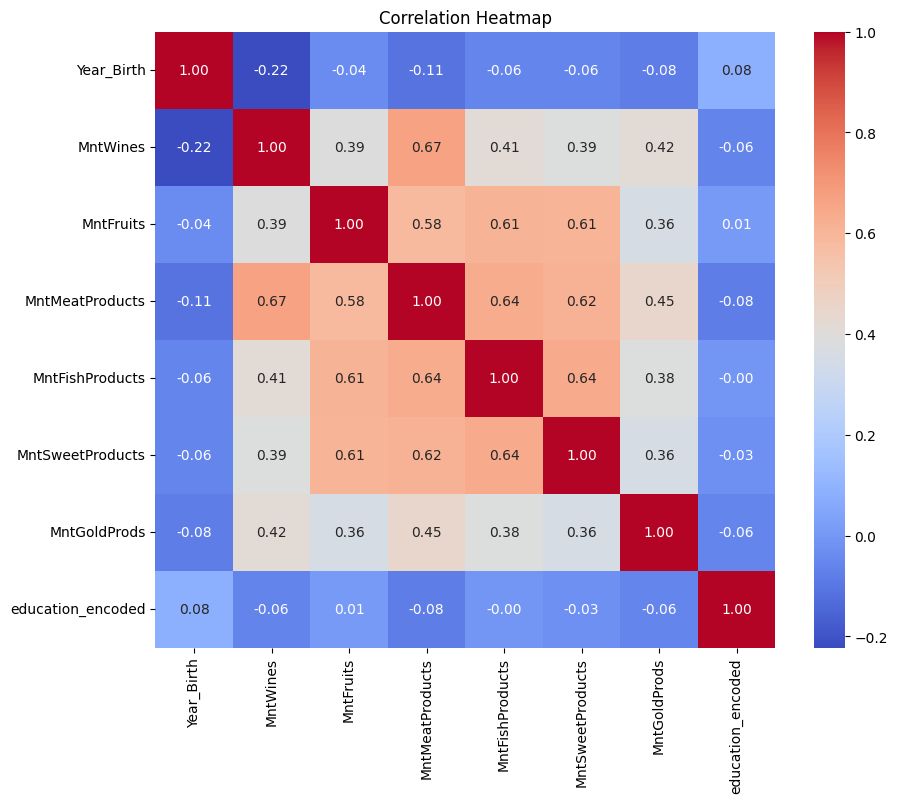

In [17]:
# Create a correlation matrix
corr_matrix = jointplot_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The heatmap correlation values all lie in the range of -0.1 to 0.1. This shows that Education and Birth Year have a very weak relationship with the types of products bought.

### K-Means Clustering
We will first use the Elbow method to decide the ideal number of clusters before using a 2D and 3D graph to visualise the clustering.

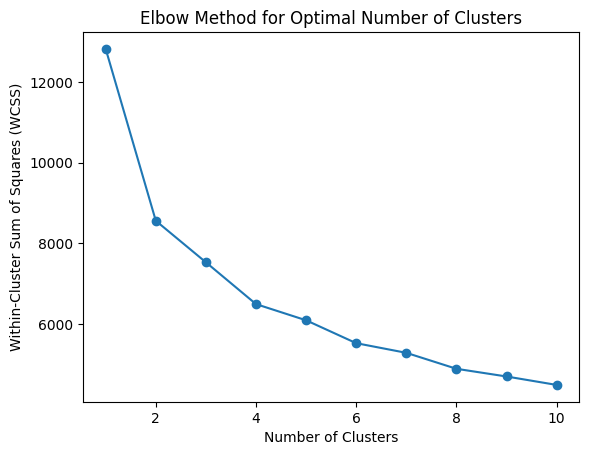

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(jointplot_cleaned)

# Apply K-means clustering for a range of cluster numbers
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # inertia_ attribute gives WCSS

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


After using the Elbow method, we realise that the point where adding more clusters does not significantly reduce the WCSS is where Number of Clusters = 4. Beyond this point, the rate of decrease in WCSS becomes less pronounced, suggesting diminishing returns from adding more clusters. Hence, we shall use 4 clusters for our 2D and 3D visualisation of clustering.

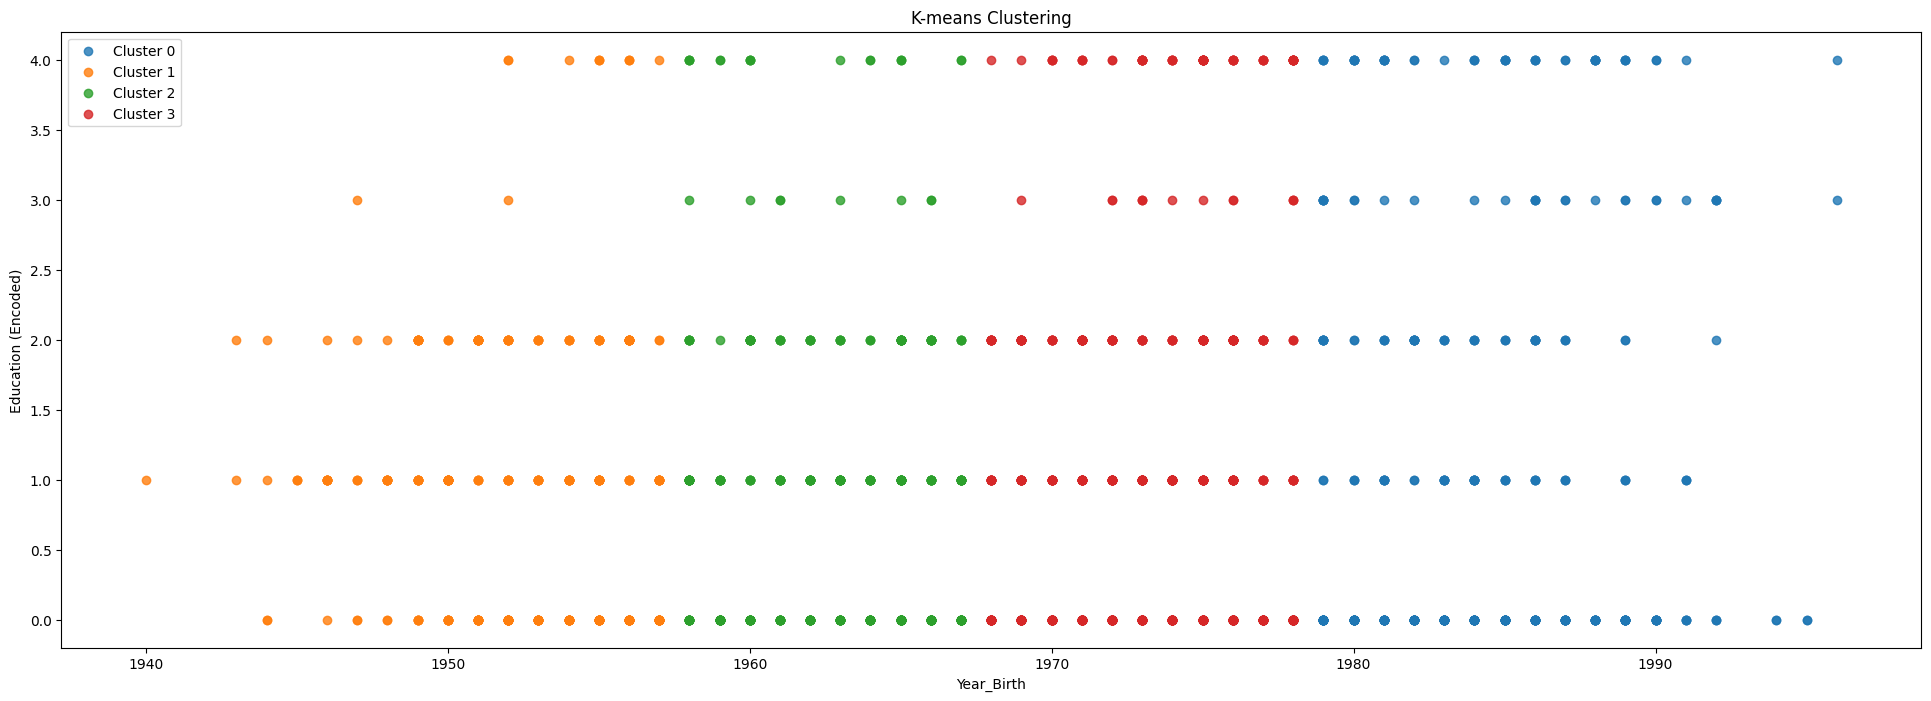

In [25]:
# Perform K-means clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(jointplot_cleaned[['Year_Birth', 'education_encoded']])

# Assign cluster labels to the DataFrame
jointplot_cleaned['cluster'] = kmeans.labels_

# Plot the data with cluster labels
plt.figure(figsize=(24, 8))
for label in range(k):
    idx = jointplot_cleaned['cluster'] == label
    plt.scatter(jointplot_cleaned.loc[idx, 'Year_Birth'], jointplot_cleaned.loc[idx, 'education_encoded'], label=f'Cluster {label}', alpha=0.8)
plt.xlabel('Year_Birth')
plt.ylabel('Education (Encoded)')
plt.title('K-means Clustering')
plt.legend() 
plt.show()

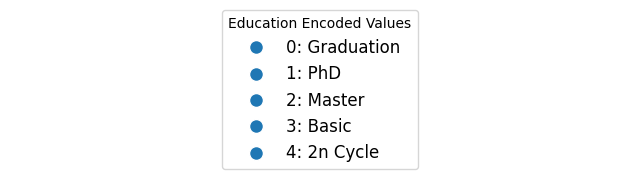

In [27]:
# Mapping between encoded values and education types
education_mapping = {'Graduation': 0, 'PhD': 1, 'Master': 2, 'Basic': 3, '2n Cycle': 4}

# Create proxy artists for legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C0', markersize=10, label=f'{encoded_value}: {education_type}') for education_type, encoded_value in education_mapping.items()]

# Create legend
plt.figure(figsize=(8, 1))
plt.axis('off')
plt.legend(handles=legend_handles, loc='center', fontsize='large', title='Education Encoded Values')
plt.show()

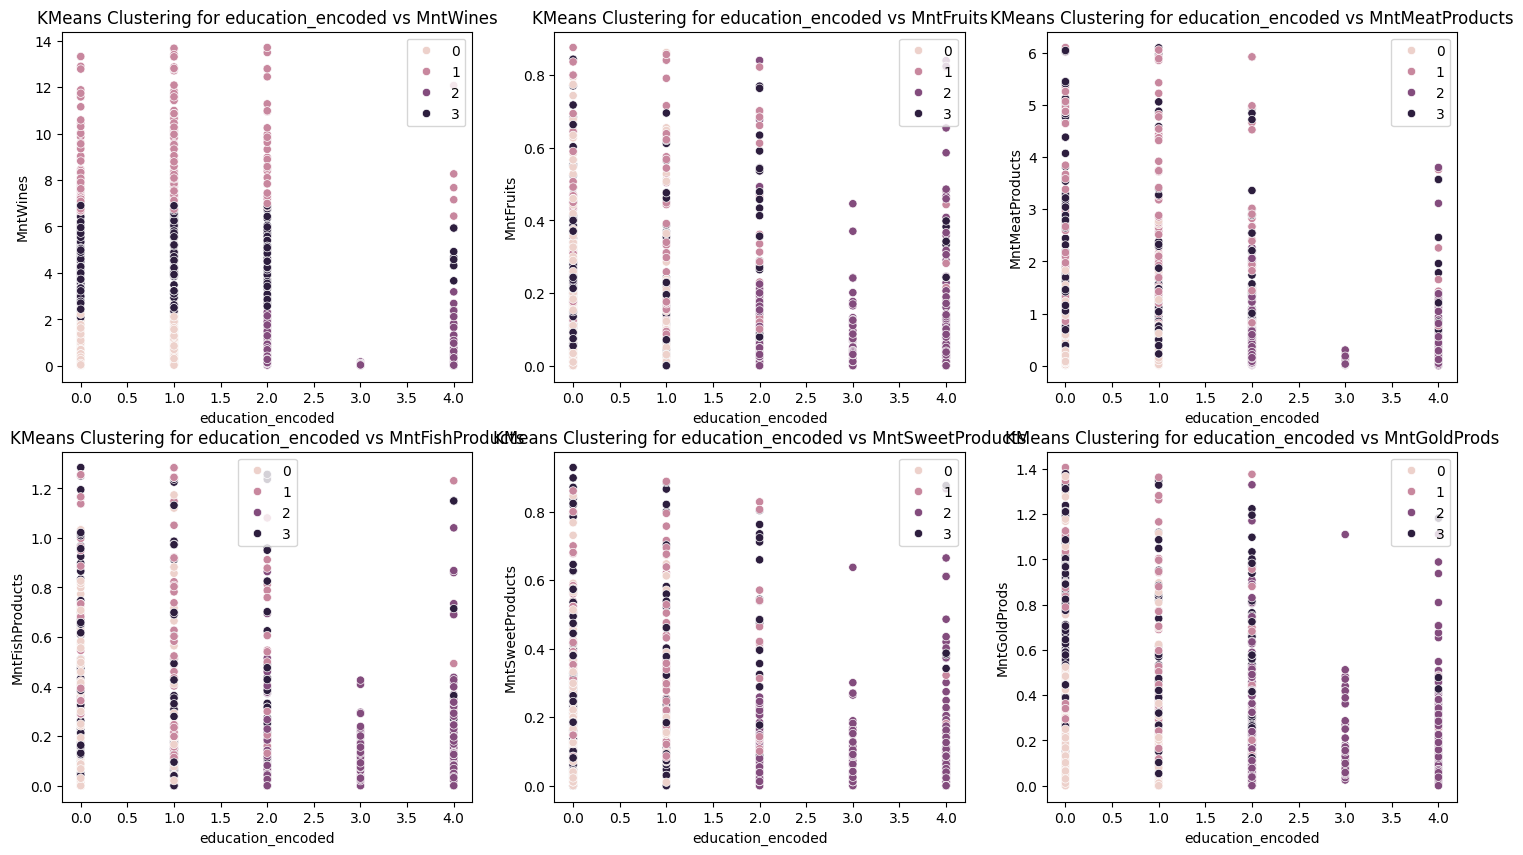

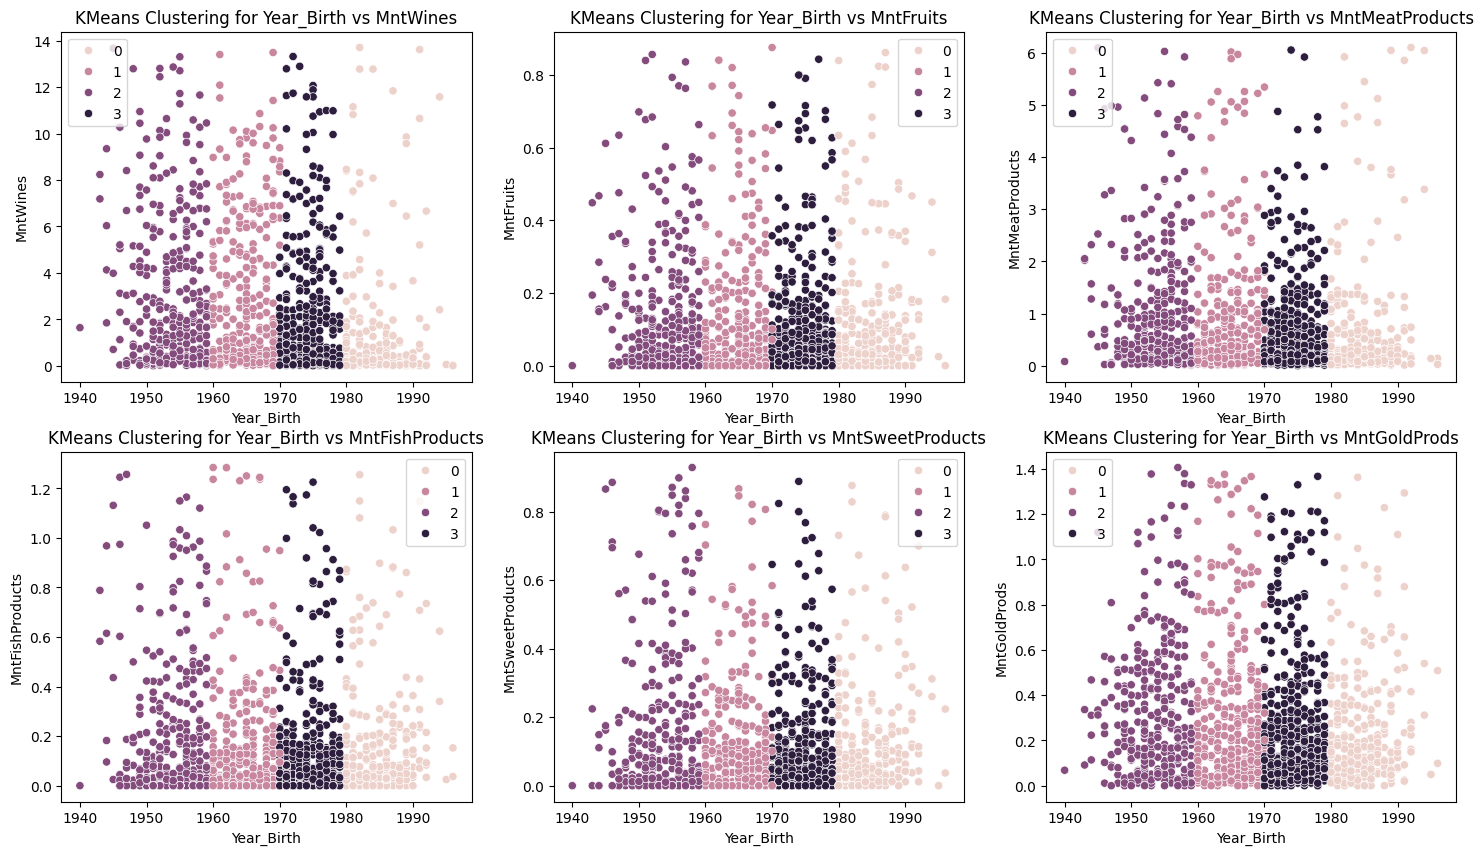

In [24]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

response_variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for predictor_variable in ['education_encoded', 'Year_Birth']:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    kmeans.fit(jointplot_cleaned[[predictor_variable] + response_variables])
    
    for i, response_variable in enumerate(response_variables):
        row = i // 3
        col = i % 3
        sb.scatterplot(data=jointplot_cleaned, x=predictor_variable, y=response_variable, hue=kmeans.labels_, ax=axes[row, col])
        axes[row, col].set_title(f'KMeans Clustering for {predictor_variable} vs {response_variable}')
        axes[row, col].set_xlabel(predictor_variable)
        axes[row, col].set_ylabel(response_variable)

    plt.show()

### Observations
The clustering graphs supports our hypothesis in that cluster 0 - 1980-1990 birth year (youngest age group) and education level, Graduation + PhD - bought relatively more Wines as compared to other products. This can be seen from how that cluster's scatter reaches a higher amount purchased on the MntWines graph. While it disagrees with our hypothesis due to the presence of an older age group and lower education level, it also partially agrees due to the precense of some higher education subjects.


On the other hand, the clustering graphs supported our hypothesis in that cluster 2 - 1940-1960 birth year (oldest age group) and education level, Master + Basic + 2n Cycle - bought relatively more Wines compared to other products. This can be seen from how that cluster's scatter is significantly more crowded and reaches a higher amount purchased on the MntGoldProds graph. While it agrees with our hypothesis due to the presence of an older age group and higher education level, it also partially agrees due to the presence of some lower education subjects.


However, the clustering data does not show a strong trend between the response and predictor variables, evident from how each cluster is not very distinct (education level) and the scatter is similar across most clusters.